In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../data/raw/Video_game_sales_db.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
dfGR = df[["Rank","Name","Genre","Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]

,Rank,Name,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Wii Sports,Sports,2006.0,41.49,29.02,3.77,8.46
1,2,Super Mario Bros.,Platform,1985.0,29.08,3.58,6.81,0.77
2,3,Mario Kart Wii,Racing,2008.0,15.85,12.88,3.79,3.31
3,4,Wii Sports Resort,Sports,2009.0,15.75,11.01,3.28,2.96
4,5,Pokemon Red/Pokemon Blue,Role-Playing,1996.0,11.27,8.89,10.22,1.00
...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,Platform,2002.0,0.01,0.00,0.00,0.00
16594,16597,Men in Black II: Alien Escape,Shooter,2003.0,0.01,0.00,0.00,0.00
16595,16598,SCORE International Baja 1000: The Official Game,Racing,2008.0,0.00,0.00,0.00,0.00
16596,16599,Know How 2,Puzzle,2010.0,0.00,0.01,0.00,0.00


In [28]:
dfGR_Clean = (
dfGR
    .dropna(axis=0) #Drop the rows which have missing values
    .reset_index(drop = True)
)
dfGR_Clean

,Rank,Name,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Wii Sports,Sports,2006.0,41.49,29.02,3.77,8.46
1,2,Super Mario Bros.,Platform,1985.0,29.08,3.58,6.81,0.77
2,3,Mario Kart Wii,Racing,2008.0,15.85,12.88,3.79,3.31
3,4,Wii Sports Resort,Sports,2009.0,15.75,11.01,3.28,2.96
4,5,Pokemon Red/Pokemon Blue,Role-Playing,1996.0,11.27,8.89,10.22,1.00
...,...,...,...,...,...,...,...,...
16322,16596,Woody Woodpecker in Crazy Castle 5,Platform,2002.0,0.01,0.00,0.00,0.00
16323,16597,Men in Black II: Alien Escape,Shooter,2003.0,0.01,0.00,0.00,0.00
16324,16598,SCORE International Baja 1000: The Official Game,Racing,2008.0,0.00,0.00,0.00,0.00
16325,16599,Know How 2,Puzzle,2010.0,0.00,0.01,0.00,0.00


In [42]:
#This is to only find new games which are ranked high
dfGR_BN = (
dfGR_Clean
    .loc[lambda x: x["Year"] >= 2000] # Filter for games in this century
    .loc[lambda x: x["Rank"] <= 2500] # Only looking for games ranked 2500 or less
    .reset_index(drop = True)
)

In [44]:
# Sorting Sales by region
dfGR_NA = (dfGR_BN[["Rank","Genre","Year","NA_Sales"]])
dfGR_EU = (dfGR_Clean[["Rank","Genre","Year","EU_Sales"]])
dfGR_JP = (dfGR_Clean[["Rank","Genre","Year","JP_Sales"]])
dfGR_Other = (dfGR_Clean[["Rank","Genre","Year","Other_Sales"]])
dfGR_Clean.Genre.unique() #To check unique Types of Genres in the Dataframe

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [45]:
dfGR_NA

,Rank,Genre,Year,NA_Sales
0,1,Sports,2006.0,41.49
1,3,Racing,2008.0,15.85
2,4,Sports,2009.0,15.75
3,7,Platform,2006.0,11.38
4,8,Misc,2006.0,14.03
...,...,...,...,...
1972,2495,Sports,2011.0,0.78
1973,2496,Platform,2005.0,0.69
1974,2497,Misc,2008.0,0.77
1975,2498,Strategy,2008.0,0.58


In [68]:
P1 = (
   dfGR_NA[['Genre','NA_Sales']]
    .groupby('Genre').sum('NA_Sales')
)
P2 = (
   dfGR_EU[['Genre','EU_Sales']]
    .groupby('Genre').sum('EU_Sales')
)
P3 = (
   dfGR_JP[['Genre','JP_Sales']]
    .groupby('Genre').sum('JP_Sales')
)
P4 = (
   dfGR_Other[['Genre','Other_Sales']]
    .groupby('Genre').sum('Other_Sales')
)
SbG = P1
SbG['EU_SALES']= P2['EU_Sales']
SbG['JP_SALES']= P3['JP_Sales']
SbG['OTHER_SALES']= P4['Other_Sales']
SbG


,NA_Sales,EU_SALES,JP_SALES,OTHER_SALES
Genre,,,,
Action,477.42,516.48,158.66,184.92
Adventure,28.91,63.79,52.01,16.70
Fighting,101.75,100.00,87.15,36.19
Misc,221.72,213.82,106.67,74.02
Platform,182.20,200.67,130.65,51.51
Puzzle,30.91,50.53,56.68,12.47
Racing,177.14,236.32,56.61,76.68
Role-Playing,202.50,187.58,350.29,59.38
Shooter,381.63,310.45,38.18,101.90


<Figure size 3600x2160 with 0 Axes>

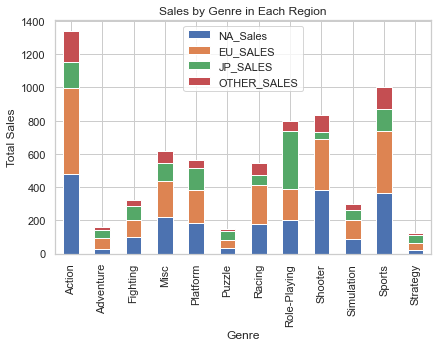

<Figure size 3600x2160 with 0 Axes>

In [83]:
SbG.plot(kind='bar', stacked=True)
plt.ylabel('Total Sales')
plt.title('Sales by Genre in Each Region')
plt.figure(figsize=(50,30))


In [32]:
dfGR_old = (
 dfGR_Clean
    .loc[lambda x: x["Year"] <= 1999] # Filter for 1980-1999
)
dfGR_new = (
 dfGR_Clean
    .loc[lambda x: x["Year"] >= 2000] # Filter for 2000-latest
)

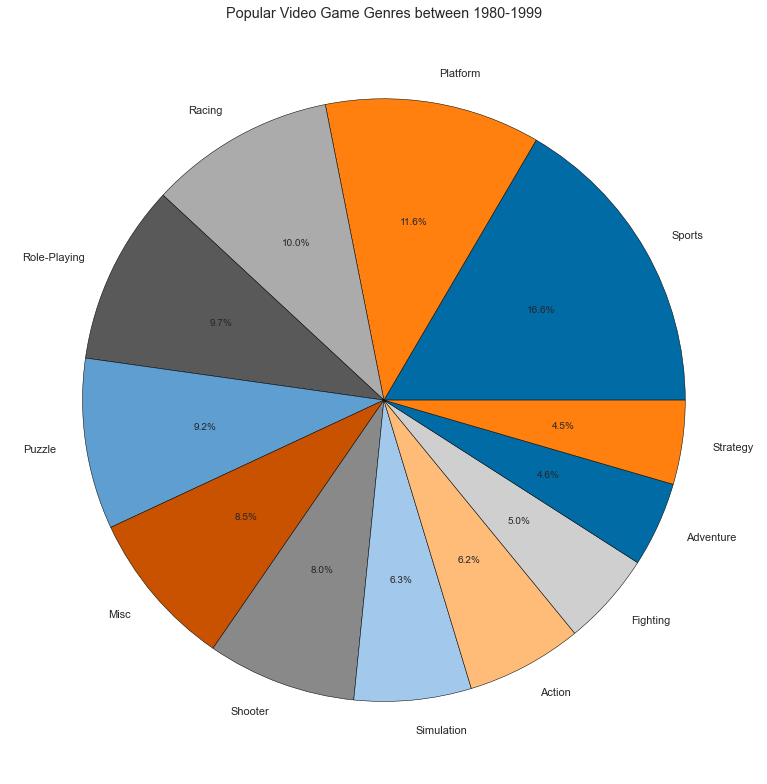

In [41]:
labels = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy']
plt.style.use('tableau-colorblind10')
fig = plt.figure(figsize=(11,11))
plt.pie(list(dfGR_old['Genre'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Popular Video Game Genres between 1980-1999')
plt.tight_layout()
plt.show()

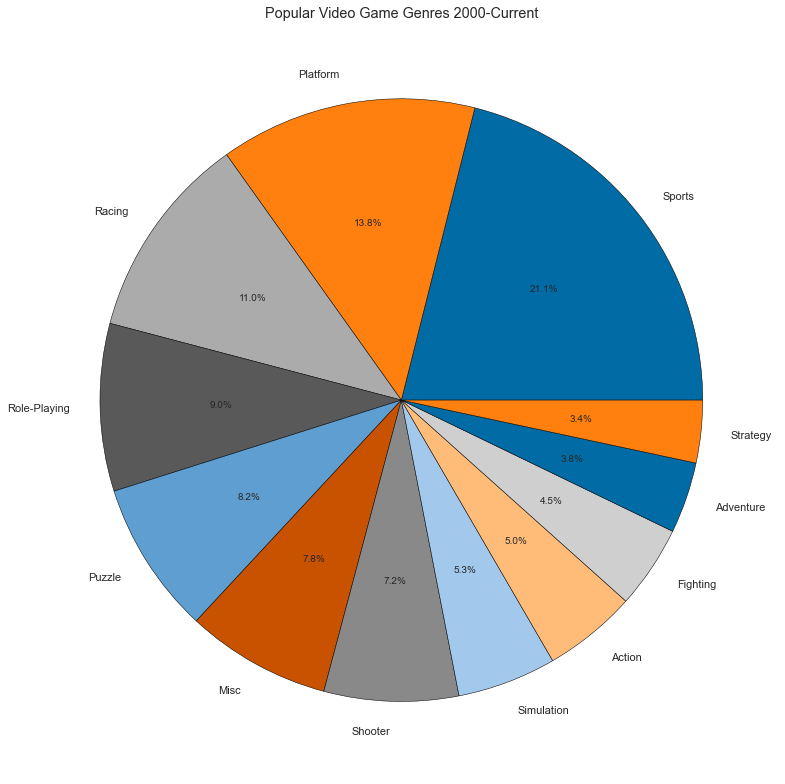

In [40]:
labels = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy']
plt.style.use('tableau-colorblind10')
fig = plt.figure(figsize=(11,11))
plt.pie(list(dfGR_new['Genre'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Popular Video Game Genres 2000-Current')
plt.tight_layout()
plt.show()

In [67]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [10]:
# Games released vs Publishers
dfp = df[['Rank','Publisher','Year']]
dfp

,Rank,Publisher,Year
0,1,Nintendo,2006.0
1,2,Nintendo,1985.0
2,3,Nintendo,2008.0
3,4,Nintendo,2009.0
4,5,Nintendo,1996.0
...,...,...,...
16593,16596,Kemco,2002.0
16594,16597,Infogrames,2003.0
16595,16598,Activision,2008.0
16596,16599,7G//AMES,2010.0


In [17]:
dfp_Clean = (
dfp
    .loc[lambda x: x["Year"] >= 2000] # Filter for games in this century
    .loc[lambda x: x["Rank"] <= 100] #Best 100 over this last century so far
    .dropna(axis = 0)
    .reset_index(drop = True)
)
dfp_Clean


,Rank,Publisher,Year
0,1,Nintendo,2006.0
1,3,Nintendo,2008.0
2,4,Nintendo,2009.0
3,7,Nintendo,2006.0
4,8,Nintendo,2006.0
...,...,...,...
71,93,Electronic Arts,2015.0
72,94,Activision,2014.0
73,98,Nintendo,2014.0
74,99,Activision,2008.0


In [18]:
dfp_Clean.Publisher.unique() #To check the unique publishers

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega'], dtype=object)

Text(0.5, 1.0, 'Top Publishers since 2000 of the Top 100 games')

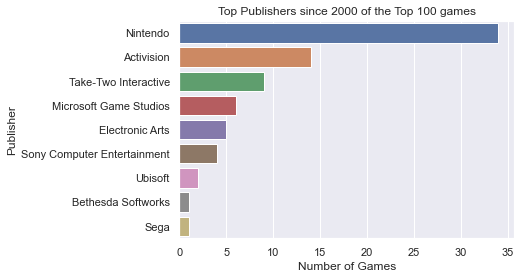

In [24]:
sns.set_theme(style="darkgrid")
publishx = sns.countplot(data = dfp_Clean,y="Publisher", order = ['Nintendo',"Activision",'Take-Two Interactive','Microsoft Game Studios','Electronic Arts','Sony Computer Entertainment','Ubisoft','Bethesda Softworks','Sega'])
plt.xlabel('Number of Games')
plt.title('Top Publishers since 2000 of the Top 100 games')